In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

sys.path.append("/Users/xiaoxuanj/work/work_allen/Ephys/code_library/ephys_code")

import functional_clustering as fc


# load matrix

In [6]:
mouse_ID='388523'
basepath = '/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/example_388523/'
X = np.load(basepath+'mouse'+mouse_ID+'_adjacency_matrix_RF.npy')
df = pd.read_csv(basepath+'mouse'+mouse_ID+'_meta_cluster_RF.csv', index_col=0)

# get probe info and separations
areas = df.area.unique().astype(str)

probenames = df.probe_id.unique().astype(str)
separations = [0]
#separations[-1]=separations[-1]-1
for probe in probenames:
    index = np.where(df.probe_id==probe)[0]
    separations = np.concatenate([separations, [index[-1]+1]],axis=0)


# plot connectivity matrix

Text(0.5, 1.0, 'Diff of CCG (+/-13 ms) grating')

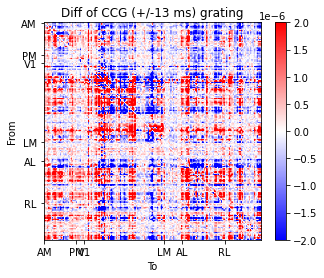

In [7]:
plt.figure(figsize=(5,4))
plt.imshow(X, vmax=0.000002, vmin=-0.000002, cmap='bwr')
plt.xticks(separations[:-1],  areas, fontsize=10)
plt.yticks(separations[:-1],  areas, fontsize=10)
plt.colorbar()
plt.xlabel('To')
plt.ylabel('From')
plt.title('Diff of CCG (+/-13 ms) grating')
#plt.savefig('/Users/xiaoxuanj/Documents/Paper_functional_connectivity/materials/mouse'+mouse_ID+'_connectivity_matrix_grating.pdf')

# plot connectivity matrix: sorted

Text(0.5, 0, 'Target')

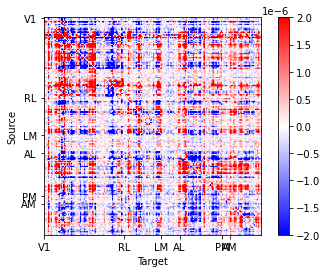

In [8]:
probes = ['probeC', 'probeF','probeD','probeE','probeB','probeA']
    
new_index=[]
new_areas=[]
separations = [0]
for a in probes:
    select_idx = np.where(df.probe_id.values==a)[0]
    if len(select_idx)>0:
        new_index.append(select_idx)
        separations = np.concatenate([separations, [separations[-1]+len(select_idx)]],axis=0)
    flat_list = [item for sublist in new_index for item in sublist]

new_areas = ['V1', 'RL', 'LM','AL', 'PM','AM']
plt.imshow(X[np.ix_(flat_list, flat_list)], vmax=0.000002, vmin=-0.000002, cmap='bwr')
plt.xticks(separations[:-1],  new_areas, fontsize=10)
plt.yticks(separations[:-1],  new_areas, fontsize=10)
plt.colorbar()
plt.ylabel('Source')
plt.xlabel('Target')


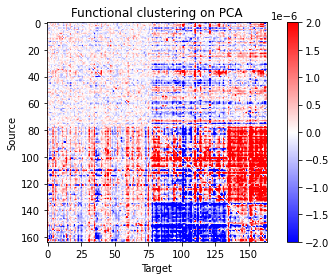

In [9]:
# plot matrix as modular structure
fit_data = X[np.argsort(df.cluster),:][:, np.argsort(df.cluster)]
plt.imshow(fit_data, cmap='bwr', vmax=0.000002, vmin=-0.000002, interpolation=None)
plt.title('Functional clustering on PCA')
plt.colorbar()
plt.ylabel('Source')
plt.xlabel('Target')
plt.tight_layout()

# clustering connectivity matrix

In [16]:
FC.Z.T.shape

(164, 34)

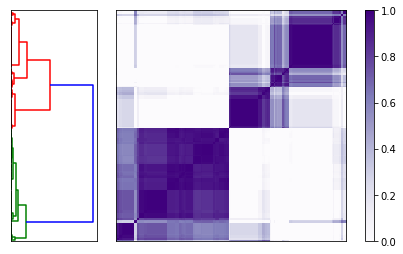

In [29]:
import functional_clustering as fc
reload(fc)

FC = fc.functional_clustering(np.nan_to_num(X))

# normalize and PCA
FC.normalize()
FC.pca()
# plotted cov of connectivity matrix

# probiliaty matrix from kmeans
matrix = FC.probability_matrix(3, data=FC.Z.T)

# hierarchical clustering
FC.linkage()

# plot hierarchical clustering matrix
FC.plot_matrix()

# save output cluster ids
FC.predict_cluster(k=3)
labels= FC.clusters



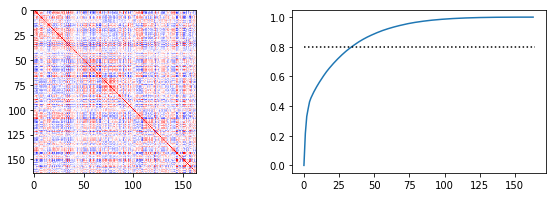

In [10]:
import pca_basic
reload(pca_basic)
pca_basic.pca_basic(FC.X_n, threshold=0.8, plot=True)


# determine number of k

In [19]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans2
from scipy.cluster.vq import whiten
#from sklearn.cluster import MiniBatchKMeans

# 1. normalization (var=1 in all dims)
Z_n = StandardScaler().fit_transform(np.nan_to_num(FC.Z.T))

n = np.shape(Z_n)[0]

import kmeans_plus
reload(kmeans_plus)

kpp = kmeans_plus.DetK(2, Z_n)
kpp.run(8)


4

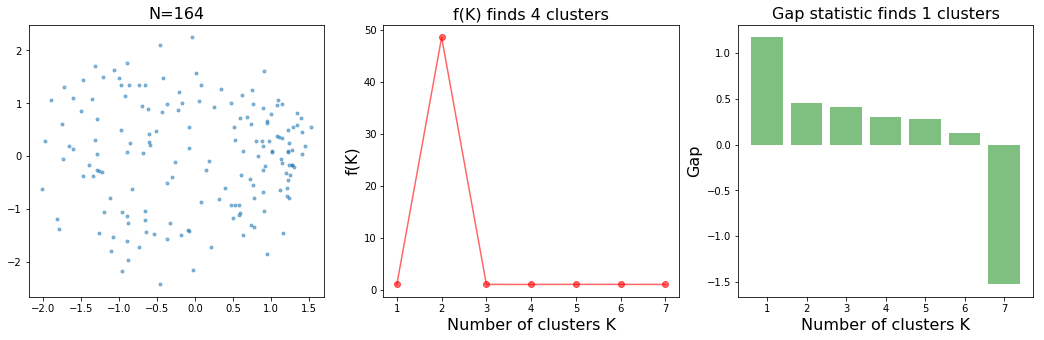

In [20]:
kpp.plot_all()
# look for minimum

# apply UMAP to visualize PCs

In [38]:
import umap
embedding = umap.UMAP(n_neighbors=3,
                      min_dist=0.4,
                      metric='correlation').fit_transform(FC.Z.T)

In [46]:
df.cluster.unique()

array([1., 3., 2.])

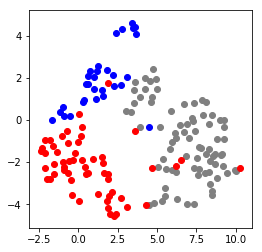

In [64]:
labels = df.cluster.values
#labels= FC.clusters
color=['gray','r', 'b']
plt.figure(figsize=(4,4))
for idx in [1,2,3]:
    plt.scatter(embedding[np.where(labels==idx)[0],0], embedding[np.where(labels==idx)[0],1], c=color[idx-1])


# plot clustering intermediate steps

In [56]:
import functional_clustering as fc
reload(fc)

FC = fc.functional_clustering(np.nan_to_num(X))


# normalize and PCA
FC.normalize()
FC.pca()
#plt.colorbar()
# plotted cov of connectivity matrix


In [12]:
from scipy.cluster.vq import kmeans2
# visualize kmeans on pca
clusters = kmeans2(FC.Z.T, 3, iter=1000, thresh=5e-6,minit='random')

In [16]:
labels = clusters[1]

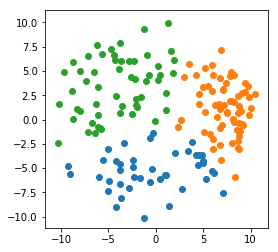

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(FC.Z.T[labels==0,0], FC.Z.T[labels==0,1])
plt.scatter(FC.Z.T[labels==1,0], FC.Z.T[labels==1,1])
plt.scatter(FC.Z.T[labels==2,0], FC.Z.T[labels==2,1])


In [30]:
# calculate boots of probability matrix
B=[]
for boot in range(10):
    # probiliaty matrix from kmeans
    matrix = FC.probability_matrix(3, data=FC.Z.T)
    B.append(FC.dist)


In [58]:
# PCA reduced matris
reduced = FC.Z.T

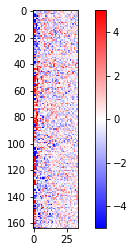

In [59]:
plt.imshow(reduced, cmap='bwr', vmax=5, vmin=-5)
plt.colorbar()


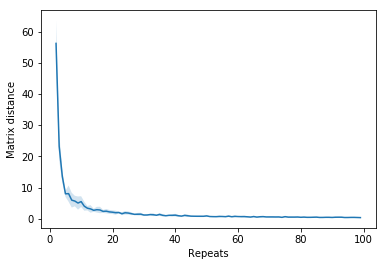

In [60]:
B=np.array(B)
mu = B.mean(0)
std = B.std(0)
plt.plot(np.arange(100), mu, )
plt.fill_between(np.arange(100), mu-std, mu+std, alpha=0.2)
plt.ylabel('Matrix distance')
plt.xlabel('Repeats')


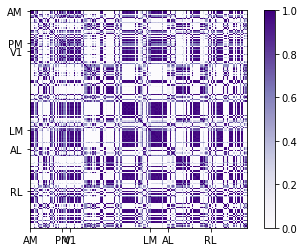

In [31]:
plt.imshow(FC.matrix, cmap='Purples')
plt.xticks(separations[:-1],  areas, fontsize=10)
plt.yticks(separations[:-1],  areas, fontsize=10)
plt.colorbar()


In [63]:
np.linalg.norm(FC.matrix-(FC.matrix*0.5))

45.17475401150515